# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Your code here
data = pd.read_csv('data_all.csv')
data

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116317,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116318,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116319,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [4]:
data.columns

Index(['e', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=785)

In [5]:
len(data)

116322

In [6]:
data.shape

(116322, 785)

In [7]:
#Revisamos cuantos diferentes valores hay para las posibles imagenes
len(data.e.unique())

62

In [8]:
data.e.value_counts()

1.0     6330
7.0     6139
3.0     5969
2.0     5869
0.0     5778
        ... 
41.0     400
20.0     382
60.0     381
51.0     368
45.0     317
Name: e, Length: 62, dtype: int64

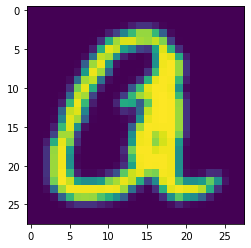

In [9]:
#Creamos un dataset de los datos y un dataset de los índices
data_columnas_x = data.drop('e', axis = 1)
data_columna_y = data['e']

#Revisamos una imagen para darnos una idea de como viene la información
imagen_1 = data_columnas_x.iloc[0].to_numpy().reshape(28, 28)
plt.imshow(imagen_1)

In [10]:
#Revisamos que imagen nos da cada una de las filas del dataset
def dibujar_imagenes(número_de_imágenes = 62):

    #Configuramos el tamaño del grid donde dibujaremos las imágenes
    fig = plt.figure(figsize = (25,10))
    
    #Creamos el loop para que vaya haciendo las imágenes, de acuerdo a los parámetros que le demos a la función 
    for element in range(1, número_de_imágenes + 1):
        imagen_muestra = data[data.e == (element - 1)].iloc[0,1:].to_numpy().reshape(28,28)
        fig.add_subplot(4, 16, element) #El 4 y el 16 es para indicarle que ponga 4 filas de hasta 16 imagenes cada una
        plt.imshow(imagen_muestra)
    plt.show();

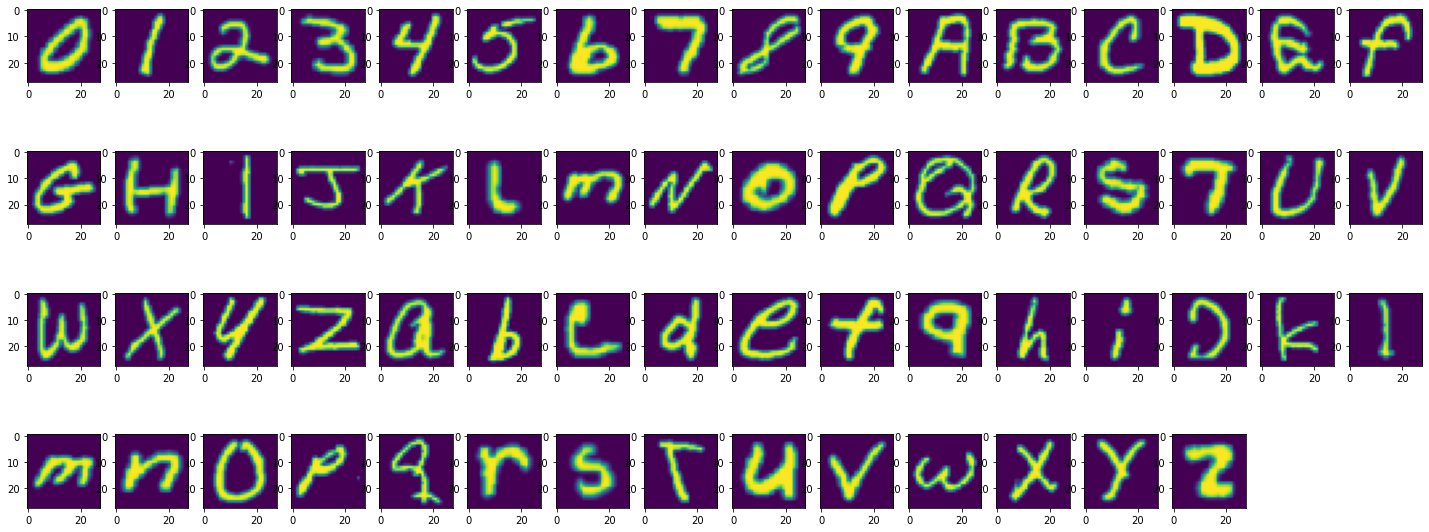

In [11]:
dibujar_imagenes ()

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [12]:
# Your code here

#Seleccionamos el rango para las letras mayúsculas
mayusculas = list(range(11,37))

#Seleccionamos las filas del dataset que tienen datos con letras mayúsculas
data_mayusculas = data.loc[data.e.isin(mayusculas)]

#Creamos las variables dependientes y la variable independiente para las imagenes que son letras mayúsculas
X = data_mayusculas.drop(['e'], axis = 1)
y = data_mayusculas['e']

#Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# LINEAR REGRESSION

In [13]:
#Inicializamos el modelo.
linreg_model = LinearRegression()

#Entrenamos el modelo con el dataset de entrenamiento
linreg_model = linreg_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
y_pred = linreg_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
data_mayusculas_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
data_mayusculas_predicted.head()

,Actual,Predicted
30754,28.0,29.228119
71603,34.0,29.286061
41464,14.0,21.726508
59683,17.0,24.373530
105242,13.0,21.564544


In [14]:
#Vemos el score del modelo en el dataset de entrenamiento
print('Score del modelo en el dataset de entrenamiento:', linreg_model.score(X_train, y_train))

#También se puede hacer con r2_score
y_train_pred = linreg_model.predict(X_train)
print('R2 del modelo en el dataset de entrenamiento:', r2_score(y_train, y_train_pred))

#Vemos un score bastante bajo

Score del modelo en el dataset de entrenamiento: 0.28059475753330965
R2 del modelo en el dataset de entrenamiento: 0.28059475753330965


In [15]:
#Vemos el score del modelo en el dataset de prueba
print('Score del modelo en el dataset de prueba:', linreg_model.score(X_test, y_test))

#También se puede hacer con r2_score
y_train_pred = linreg_model.predict(X_train)
print('R2 del modelo en el dataset de prueba:', r2_score(y_test, y_pred))

#Vemos un score con un valor raro.

Score del modelo en el dataset de prueba: -3.3328509171236916e+20
R2 del modelo en el dataset de prueba: -3.3328509171236916e+20


# LOGISTIC REGRESSION

In [16]:
#Inicializamos el modelo.
logreg_model = LogisticRegression()

#Entrenamos el modelo con el dataset de entrenamiento
logreg_model = logreg_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
y_pred = logreg_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
data_mayusculas_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
data_mayusculas_predicted.head()

/Users/arnoldoleyson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Actual,Predicted
30754,28.0,28.0
71603,34.0,33.0
41464,14.0,14.0
59683,17.0,23.0
105242,13.0,13.0


In [17]:
#Vemos el score del modelo en el dataset de entrenamiento
print('Score del modelo en el dataset de entrenamiento:', logreg_model.score(X_train, y_train))

#También se puede hacer con r2_score
y_train_pred = logreg_model.predict(X_train)
print('R2 del modelo en el dataset de entrenamiento:', r2_score(y_train, y_train_pred))

#Vemos un score bastante bueno

Score del modelo en el dataset de entrenamiento: 0.8821465859260806
R2 del modelo en el dataset de entrenamiento: 0.7203863320717758


In [18]:
#Vemos el score del modelo en el dataset de prueba
print('Score del modelo en el dataset de prueba:', logreg_model.score(X_test, y_test))

#También se puede hacer con el accuracy score
print('Accuracy Score del modelo en el dataset de prueba:', accuracy_score(y_test, y_pred))

#También se puede hacer con r2_score
y_train_pred = logreg_model.predict(X_train)
print('R2 del modelo en el dataset de prueba:', r2_score(y_test, y_pred))

#Vemos que en el dataset de prueba el score disminuyó

Score del modelo en el dataset de prueba: 0.8154597845151591
Accuracy Score del modelo en el dataset de prueba: 0.8154597845151591
R2 del modelo en el dataset de prueba: 0.5693549243337926


In [19]:
#Podemos calcular el precission score para cada letra
precision_score(y_test, y_pred, average = None)

array([0.68531469, 0.82758621, 0.75706215, 0.79365079, 0.80664653,
       0.6875    , 0.73809524, 0.88468809, 0.68794326, 0.60465116,
       0.88262911, 0.87131367, 0.72067039, 0.90825688, 0.8125    ,
       0.63      , 0.68783069, 0.91015169, 0.91036415, 0.77456647,
       0.6803653 , 0.78636364, 0.65957447, 0.76530612, 0.74509804,
       0.74157303])

Text(0.5, 1.0, 'Matríz de confusión')

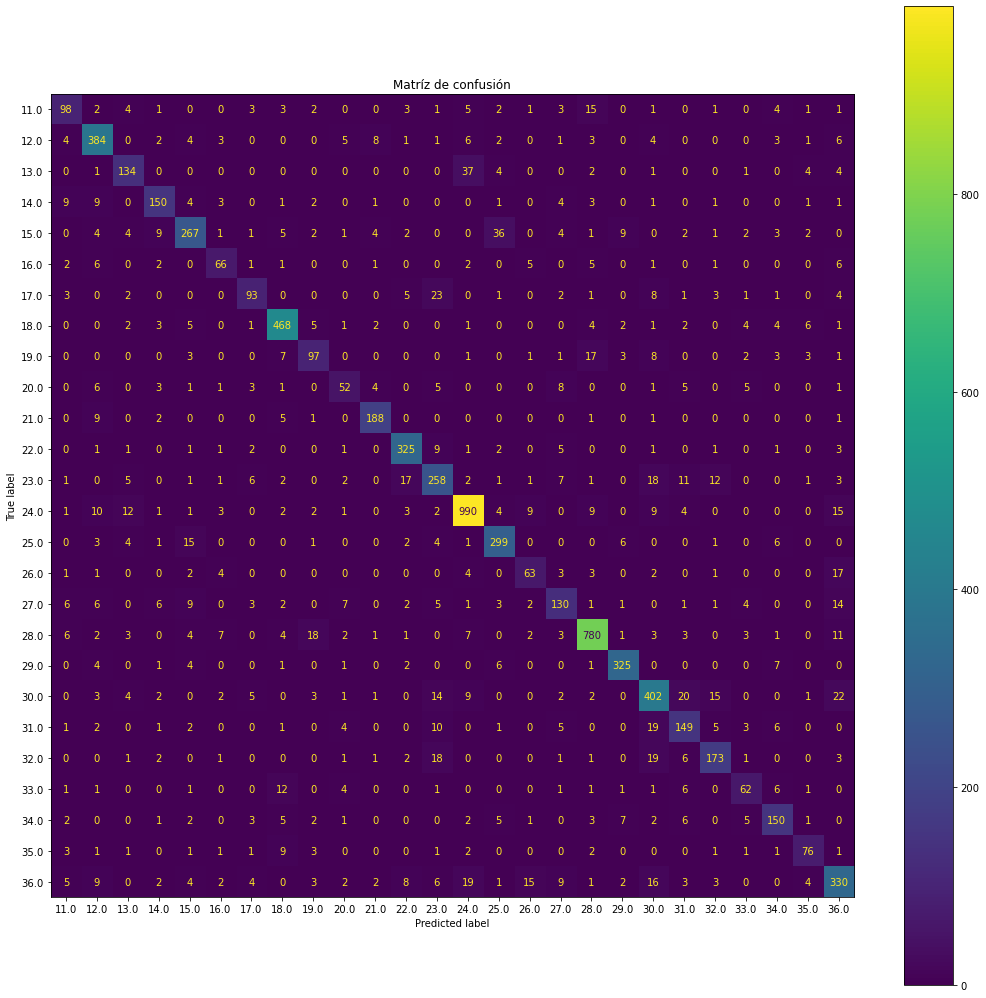

In [20]:
#Podemos calcular la matríz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

#La podemos dejar graficada para comprender mejor
fig, ax = plt.subplots(figsize = (18, 18))
plot_confusion_matrix(logreg_model, X_test, y_test, ax = ax, values_format = '')
plt.title('Matríz de confusión')

# KNN (K- Narest Neighbor)

In [21]:
#No se corre el modelo porque se tarda mucho en ejecutar

In [22]:
#Inicializamos el modelo.

#Definimos el número de vecinos con los que queremos trabajar
#num_neighbors = 3
#knn_model = neighbors.KNeighborsClassifier(num_neighbors, weights = 'distance')

#Entrenamos el modelo con el dataset de entrenamiento
#knn_model = knn_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
#y_pred = knn_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
#data_mayusculas_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
#data_mayusculas_predicted.head()

# DECISION TREE

In [23]:
#Inicializamos el modelo.
decisiontree_model = DecisionTreeClassifier(max_depth = 6, random_state = 101)

#Entrenamos el modelo con el dataset de entrenamiento
decisiontree_model = decisiontree_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
y_pred = decisiontree_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
data_mayusculas_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
data_mayusculas_predicted.head()

,Actual,Predicted
30754,28.0,28.0
71603,34.0,28.0
41464,14.0,25.0
59683,17.0,22.0
105242,13.0,30.0


In [24]:
#Vemos el score del modelo en el dataset de entrenamiento
print('Score del modelo en el dataset de entrenamiento:', decisiontree_model.score(X_train, y_train))

#También se puede hacer con r2_score
y_train_pred = decisiontree_model.predict(X_train)
print('R2 del modelo en el dataset de entrenamiento:', r2_score(y_train, y_train_pred))

#Vemos un score bastante bajo

Score del modelo en el dataset de entrenamiento: 0.5702234286907496
R2 del modelo en el dataset de entrenamiento: -0.011874047731073256


In [25]:
#Vemos el score del modelo en el dataset de prueba
print('Score del modelo en el dataset de prueba:', decisiontree_model.score(X_test, y_test))

#También se puede hacer con el accuracy score
print('Accuracy Score del modelo en el dataset de prueba:', accuracy_score(y_test, y_pred))

#También se puede hacer con r2_score
y_train_pred = decisiontree_model.predict(X_train)
print('R2 del modelo en el dataset de prueba:', r2_score(y_test, y_pred))

#Vemos que en el dataset de prueba el score disminuyó

Score del modelo en el dataset de prueba: 0.5641443247306439
Accuracy Score del modelo en el dataset de prueba: 0.5641443247306439
R2 del modelo en el dataset de prueba: -0.028397735330443208


In [26]:
#Podemos calcular el precission score para cada letra
precision_score(y_test, y_pred, average = None)

/Users/arnoldoleyson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.17647059, 0.6255144 , 0.52222222, 0.31137725, 0.56809339,
       0.68181818, 0.        , 0.72745902, 0.35483871, 0.        ,
       0.30409357, 0.60674157, 0.56868132, 0.76862401, 0.34626866,
       0.34615385, 0.36893204, 0.68335147, 0.824     , 0.55835962,
       0.49264706, 0.72340426, 0.1875    , 0.23873874, 0.56140351,
       0.47452229])

Text(0.5, 1.0, 'Matríz de confusión')

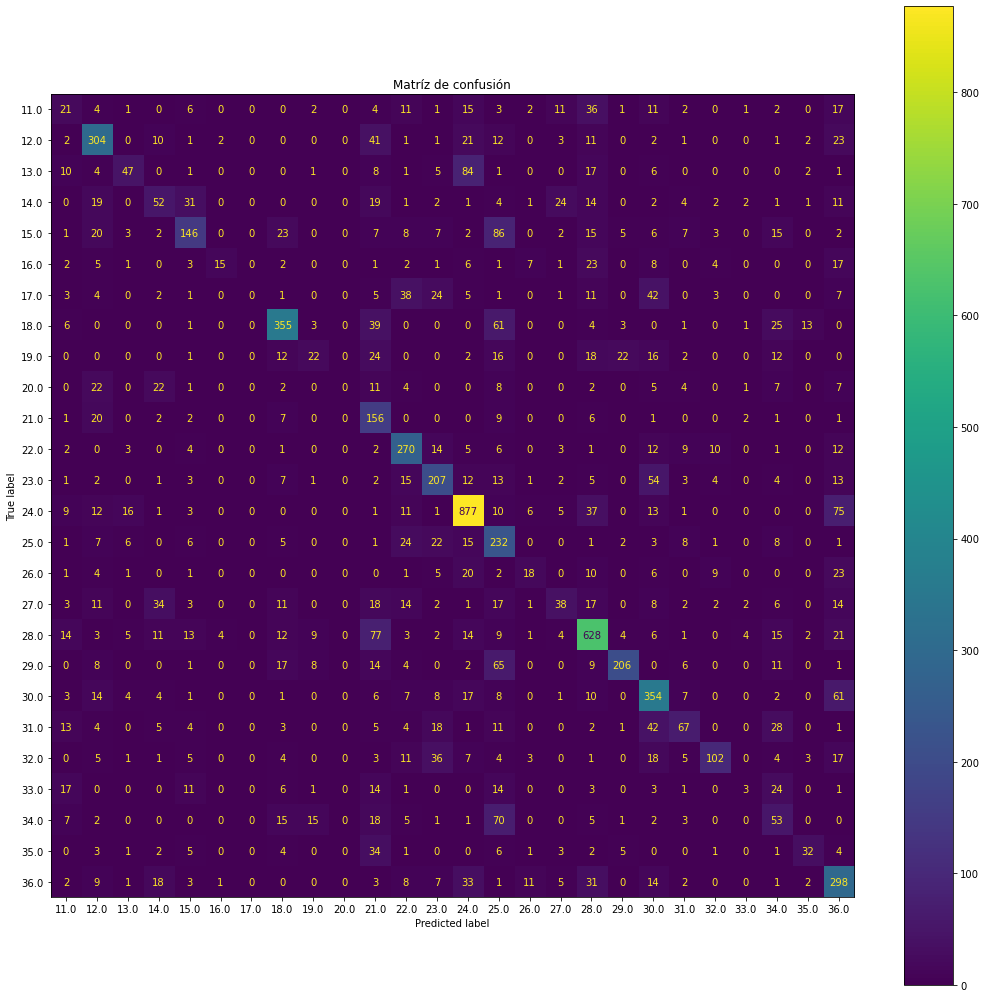

In [27]:
#Podemos calcular la matríz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

#La podemos dejar graficada para comprender mejor
fig, ax = plt.subplots(figsize = (18, 18))
plot_confusion_matrix(decisiontree_model, X_test, y_test, ax = ax, values_format = '')
plt.title('Matríz de confusión')

# RANDOM FOREST

In [28]:
#Inicializamos el modelo.
randomforest_model = RandomForestClassifier(n_estimators = 300, max_depth = 5, random_state = 101)

#Entrenamos el modelo con el dataset de entrenamiento
randomforest_model = randomforest_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
y_pred = randomforest_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
data_mayusculas_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
data_mayusculas_predicted.head()

,Actual,Predicted
30754,28.0,28.0
71603,34.0,28.0
41464,14.0,25.0
59683,17.0,23.0
105242,13.0,24.0


In [29]:
#Vemos el score del modelo en el dataset de entrenamiento
print('Score del modelo en el dataset de entrenamiento:', randomforest_model.score(X_train, y_train))

#También se puede hacer con r2_score
y_train_pred = randomforest_model.predict(X_train)
print('R2 del modelo en el dataset de entrenamiento:', r2_score(y_train, y_train_pred))

#Vemos un score bajo, aunque mejoró respecto al modelo de Decision Tree

Score del modelo en el dataset de entrenamiento: 0.6218834829818334
R2 del modelo en el dataset de entrenamiento: 0.14993411803215073


In [30]:
#Vemos el score del modelo en el dataset de prueba
print('Score del modelo en el dataset de prueba:', randomforest_model.score(X_test, y_test))

#También se puede hacer con el accuracy score
print('Accuracy Score del modelo en el dataset de prueba:', accuracy_score(y_test, y_pred))

#También se puede hacer con r2_score
y_train_pred = randomforest_model.predict(X_train)
print('R2 del modelo en el dataset de prueba:', r2_score(y_test, y_pred))

#Vemos que en el dataset de prueba el score se mantiene bastante similar al de entrenamiento

Score del modelo en el dataset de prueba: 0.6245301929341017
Accuracy Score del modelo en el dataset de prueba: 0.6245301929341017
R2 del modelo en el dataset de prueba: 0.17952273953512965


In [31]:
#Podemos calcular el precission score para cada letra
precision_score(y_test, y_pred, average = None)

/Users/arnoldoleyson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.59105431, 0.94736842, 0.97727273, 0.65490196,
       0.        , 0.        , 0.50547046, 0.        , 0.        ,
       0.85      , 0.78384798, 0.57110609, 0.64738806, 0.61711712,
       0.        , 0.82352941, 0.56831395, 0.66888889, 0.66256591,
       0.80188679, 0.96629213, 1.        , 0.81818182, 1.        ,
       0.57019438])

Text(0.5, 1.0, 'Matríz de confusión')

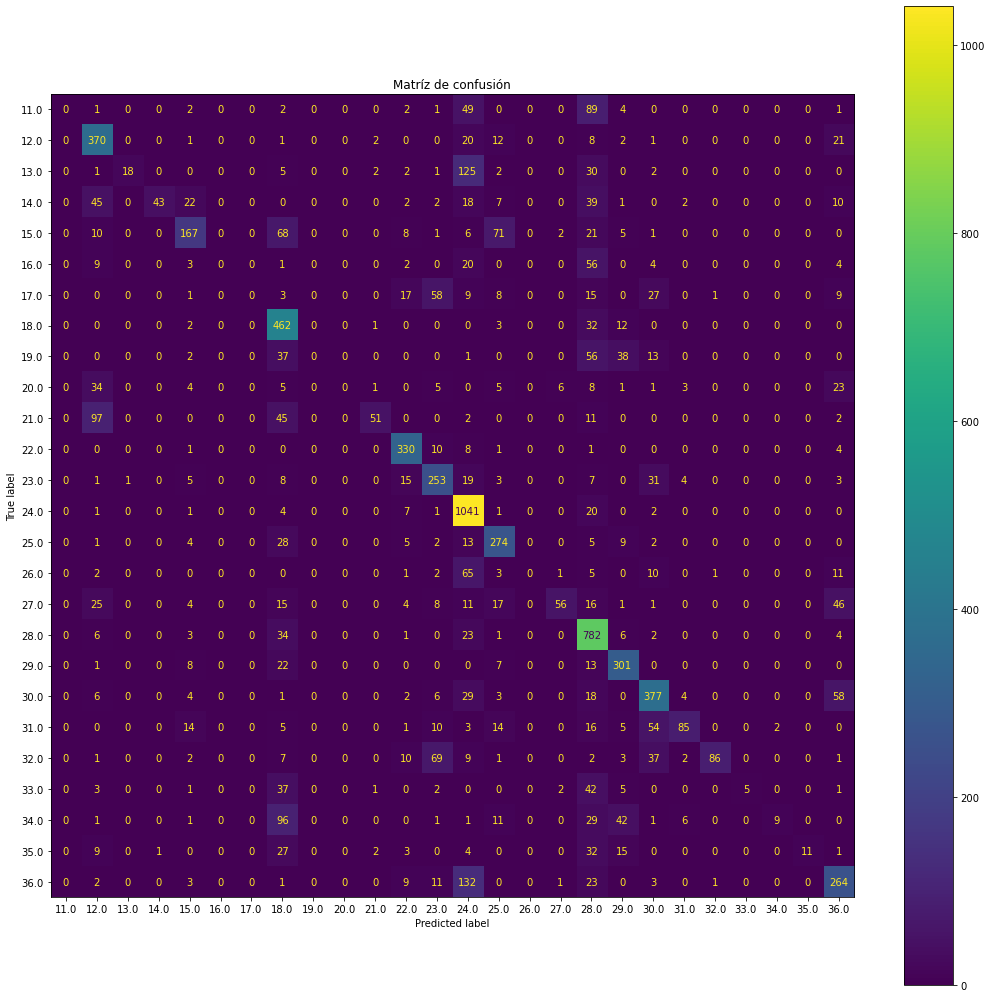

In [32]:
#Podemos calcular la matríz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

#La podemos dejar graficada para comprender mejor
fig, ax = plt.subplots(figsize = (18, 18))
plot_confusion_matrix(randomforest_model, X_test, y_test, ax = ax, values_format = '')
plt.title('Matríz de confusión')

* Try to do the same thing with lowercases.

In [33]:
# Your code here

#Seleccionamos el rango para las letras minúsculas
minusculas = list(range(37,63))

#Seleccionamos las filas del dataset que tienen datos con letras minúsculas
data_minusculas = data.loc[data.e.isin(minusculas)]

#Creamos las variables dependientes y la variable independiente para las imagenes que son letras minúsculas
X = data_minusculas.drop(['e'], axis = 1)
y = data_minusculas['e']

#Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# LINEAR REGRESSION

In [34]:
#Inicializamos el modelo.
linreg_model = LinearRegression()

#Entrenamos el modelo con el dataset de entrenamiento
linreg_model = linreg_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
y_pred = linreg_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
data_minusculas_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
data_minusculas_predicted.head()

,Actual,Predicted
7137,59.0,47.273089
116204,52.0,50.215718
33194,48.0,51.421483
97896,40.0,40.564168
107490,55.0,51.313437


In [35]:
#Vemos el score del modelo en el dataset de entrenamiento
print('Score del modelo en el dataset de entrenamiento:', linreg_model.score(X_train, y_train))

#También se puede hacer con r2_score
y_train_pred = linreg_model.predict(X_train)
print('R2 del modelo en el dataset de entrenamiento:', r2_score(y_train, y_train_pred))

#Vemos un score bajo

Score del modelo en el dataset de entrenamiento: 0.40739381022456045
R2 del modelo en el dataset de entrenamiento: 0.40739381022456045


In [36]:
#Vemos el score del modelo en el dataset de prueba
print('Score del modelo en el dataset de prueba:', linreg_model.score(X_test, y_test))

#También se puede hacer con r2_score
y_train_pred = linreg_model.predict(X_train)
print('R2 del modelo en el dataset de prueba:', r2_score(y_test, y_pred))

#Vemos un score con un valor raro.

Score del modelo en el dataset de prueba: -4.477398030400957e+16
R2 del modelo en el dataset de prueba: -4.477398030400957e+16


# LOGISTIC REGRESSION

In [37]:
#Inicializamos el modelo.
logreg_model = LogisticRegression()

#Entrenamos el modelo con el dataset de entrenamiento
logreg_model = logreg_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
y_pred = logreg_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
data_minusculas_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
data_minusculas_predicted.head()

/Users/arnoldoleyson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Actual,Predicted
7137,59.0,55.0
116204,52.0,52.0
33194,48.0,48.0
97896,40.0,40.0
107490,55.0,55.0


In [38]:
#Vemos el score del modelo en el dataset de entrenamiento
print('Score del modelo en el dataset de entrenamiento:', logreg_model.score(X_train, y_train))

#También se puede hacer con r2_score
y_train_pred = logreg_model.predict(X_train)
print('R2 del modelo en el dataset de entrenamiento:', r2_score(y_train, y_train_pred))

#Vemos un score bastante bueno

Score del modelo en el dataset de entrenamiento: 0.862441634751587
R2 del modelo en el dataset de entrenamiento: 0.7550875389273557


In [39]:
#Vemos el score del modelo en el dataset de prueba
print('Score del modelo en el dataset de prueba:', logreg_model.score(X_test, y_test))

#También se puede hacer con el accuracy score
print('Accuracy Score del modelo en el dataset de prueba:', accuracy_score(y_test, y_pred))

#También se puede hacer con r2_score
y_train_pred = logreg_model.predict(X_train)
print('R2 del modelo en el dataset de prueba:', r2_score(y_test, y_pred))

#Vemos que en el dataset de prueba el score disminuyó

Score del modelo en el dataset de prueba: 0.7941454202077431
Accuracy Score del modelo en el dataset de prueba: 0.7941454202077431
R2 del modelo en el dataset de prueba: 0.6372697173928761


In [40]:
#Podemos calcular el precission score para cada letra
precision_score(y_test, y_pred, average = None)

array([0.83105023, 0.74509804, 0.84821429, 0.90186457, 0.67708333,
       0.52554745, 0.78552279, 0.41509434, 0.63380282, 0.625     ,
       0.80819912, 0.79439252, 0.84158416, 0.84313725, 0.75      ,
       0.49315068, 0.856     , 0.79439252, 0.76268861, 0.775     ,
       0.79591837, 0.79699248, 0.61165049, 0.6344086 , 0.69911504])

Text(0.5, 1.0, 'Matríz de confusión')

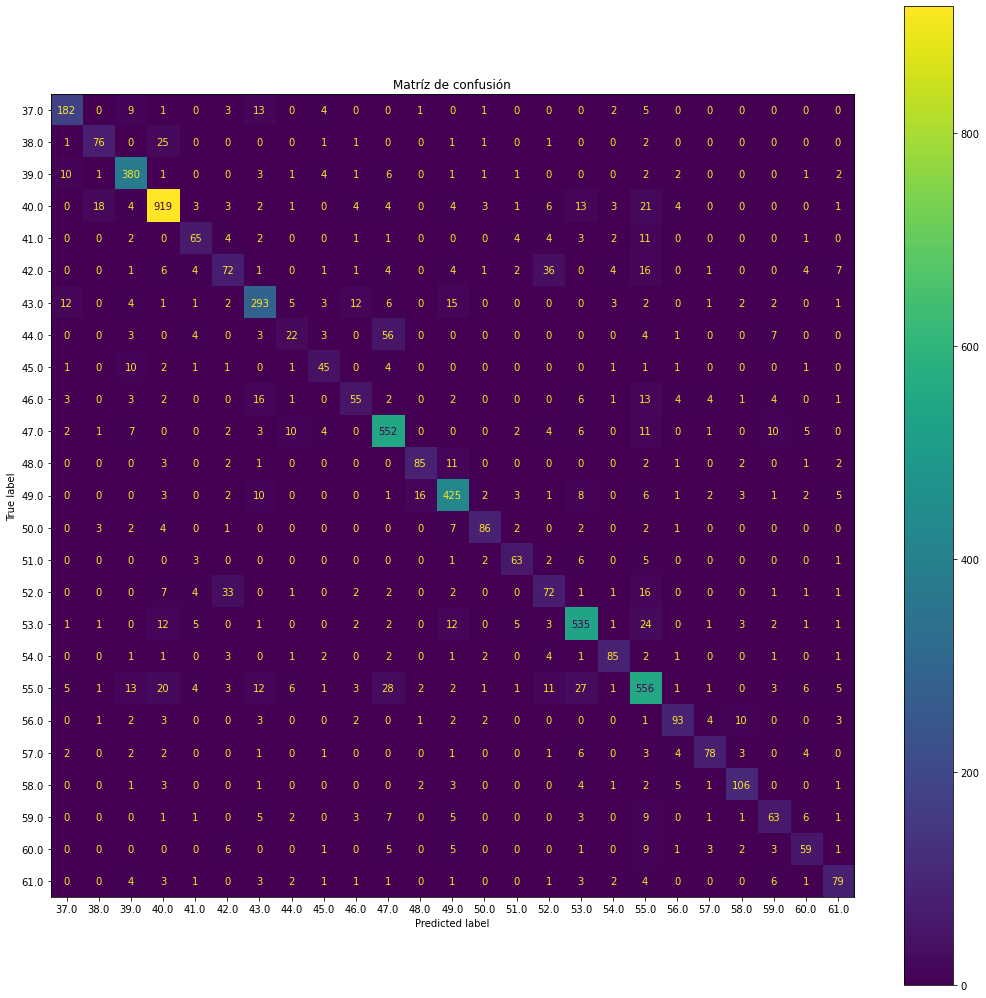

In [41]:
#Podemos calcular la matríz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

#La podemos dejar graficada para comprender mejor
fig, ax = plt.subplots(figsize = (18, 18))
plot_confusion_matrix(logreg_model, X_test, y_test, ax = ax, values_format = '')
plt.title('Matríz de confusión')

# KNN (K- Narest Neighbor)

In [42]:
#No se corre el modelo porque se tarda mucho en ejecutar

In [43]:
#Inicializamos el modelo.

#Definimos el número de vecinos con los que queremos trabajar
#num_neighbors = 3
#knn_model = neighbors.KNeighborsClassifier(num_neighbors, weights = 'distance')

#Entrenamos el modelo con el dataset de entrenamiento
#knn_model = knn_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
#y_pred = knn_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
#data_minusculas_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
#data_minusculas_predicted.head()

# DECISION TREE

In [44]:
#Inicializamos el modelo.
decisiontree_model = DecisionTreeClassifier(max_depth = 6, random_state = 101)

#Entrenamos el modelo con el dataset de entrenamiento
decisiontree_model = decisiontree_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
y_pred = decisiontree_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
data_minusculas_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
data_minusculas_predicted.head()

,Actual,Predicted
7137,59.0,59.0
116204,52.0,42.0
33194,48.0,40.0
97896,40.0,40.0
107490,55.0,55.0


In [45]:
#Vemos el score del modelo en el dataset de entrenamiento
print('Score del modelo en el dataset de entrenamiento:', decisiontree_model.score(X_train, y_train))

#También se puede hacer con r2_score
y_train_pred = decisiontree_model.predict(X_train)
print('R2 del modelo en el dataset de entrenamiento:', r2_score(y_train, y_train_pred))

#Vemos un score relativamente bajo

Score del modelo en el dataset de entrenamiento: 0.6529038350558732
R2 del modelo en el dataset de entrenamiento: 0.22943518766665594


In [46]:
#Vemos el score del modelo en el dataset de prueba
print('Score del modelo en el dataset de prueba:', decisiontree_model.score(X_test, y_test))

#También se puede hacer con el accuracy score
print('Accuracy Score del modelo en el dataset de prueba:', accuracy_score(y_test, y_pred))

#También se puede hacer con r2_score
y_train_pred = decisiontree_model.predict(X_train)
print('R2 del modelo en el dataset de prueba:', r2_score(y_test, y_pred))

#Vemos que en el dataset de prueba el score disminuyó

Score del modelo en el dataset de prueba: 0.6333018570978911
Accuracy Score del modelo en el dataset de prueba: 0.6333018570978911
R2 del modelo en el dataset de prueba: 0.2335438925741934


In [47]:
#Podemos calcular el precission score para cada letra
precision_score(y_test, y_pred, average = None)

/Users/arnoldoleyson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.54693878, 0.55140187, 0.64197531, 0.76428571, 0.        ,
       0.25454545, 0.68333333, 0.        , 0.50704225, 0.15068493,
       0.6813602 , 0.65346535, 0.80224719, 0.73275862, 0.14509804,
       0.35897436, 0.86788991, 0.65333333, 0.61055276, 0.37980769,
       0.57894737, 0.7032967 , 0.41509434, 0.27338129, 0.        ])

Text(0.5, 1.0, 'Matríz de confusión')

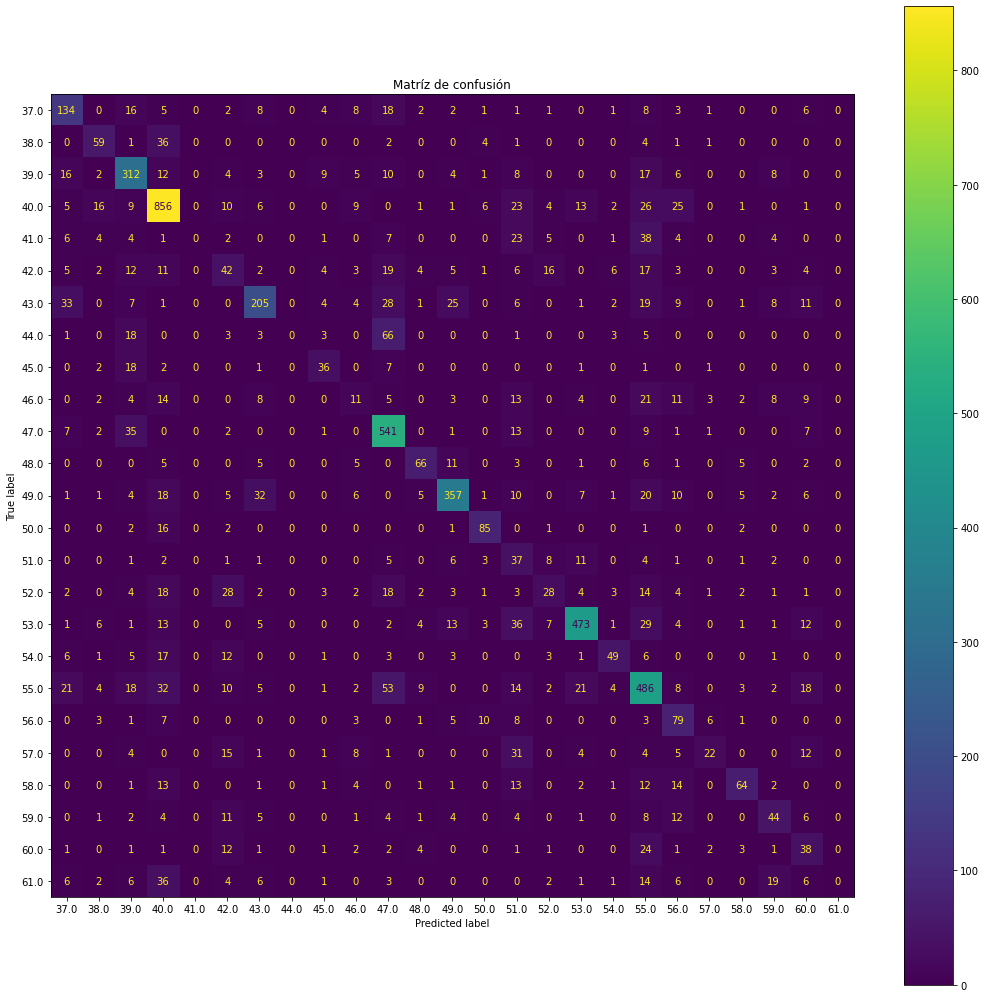

In [48]:
#Podemos calcular la matríz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

#La podemos dejar graficada para comprender mejor
fig, ax = plt.subplots(figsize = (18, 18))
plot_confusion_matrix(decisiontree_model, X_test, y_test, ax = ax, values_format = '')
plt.title('Matríz de confusión')

# RANDOM FOREST

In [49]:
#Inicializamos el modelo.
randomforest_model = RandomForestClassifier(n_estimators = 300, max_depth = 5, random_state = 101)

#Entrenamos el modelo con el dataset de entrenamiento
randomforest_model = randomforest_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
y_pred = randomforest_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
data_minusculas_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
data_minusculas_predicted.head()

,Actual,Predicted
7137,59.0,43.0
116204,52.0,52.0
33194,48.0,40.0
97896,40.0,40.0
107490,55.0,55.0


In [50]:
#Vemos el score del modelo en el dataset de entrenamiento
print('Score del modelo en el dataset de entrenamiento:', randomforest_model.score(X_train, y_train))

#También se puede hacer con r2_score
y_train_pred = randomforest_model.predict(X_train)
print('R2 del modelo en el dataset de entrenamiento:', r2_score(y_train, y_train_pred))

#Vemos un score bajo, aunque mejoró un poco respecto al modelo de Decision Tree

Score del modelo en el dataset de entrenamiento: 0.6672787366874771
R2 del modelo en el dataset de entrenamiento: 0.3697566216820102


In [51]:
#Vemos el score del modelo en el dataset de prueba
print('Score del modelo en el dataset de prueba:', randomforest_model.score(X_test, y_test))

#También se puede hacer con el accuracy score
print('Accuracy Score del modelo en el dataset de prueba:', accuracy_score(y_test, y_pred))

#También se puede hacer con r2_score
y_train_pred = randomforest_model.predict(X_train)
print('R2 del modelo en el dataset de prueba:', r2_score(y_test, y_pred))

#Vemos que en el dataset de prueba el score se mantiene bastante similar al de entrenamiento

Score del modelo en el dataset de prueba: 0.6605288007554296
Accuracy Score del modelo en el dataset de prueba: 0.6605288007554296
R2 del modelo en el dataset de prueba: 0.34342440489576487


In [52]:
#Podemos calcular el precission score para cada letra
precision_score(y_test, y_pred, average = None)

/Users/arnoldoleyson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.83125   , 0.        , 0.66796117, 0.62305699, 0.        ,
       0.84615385, 0.60224719, 0.        , 0.        , 0.        ,
       0.67013889, 0.92424242, 0.70261438, 0.88135593, 0.        ,
       1.        , 0.69823232, 0.65079365, 0.56461233, 0.88888889,
       0.96296296, 0.88764045, 0.9       , 0.        , 0.94444444])

Text(0.5, 1.0, 'Matríz de confusión')

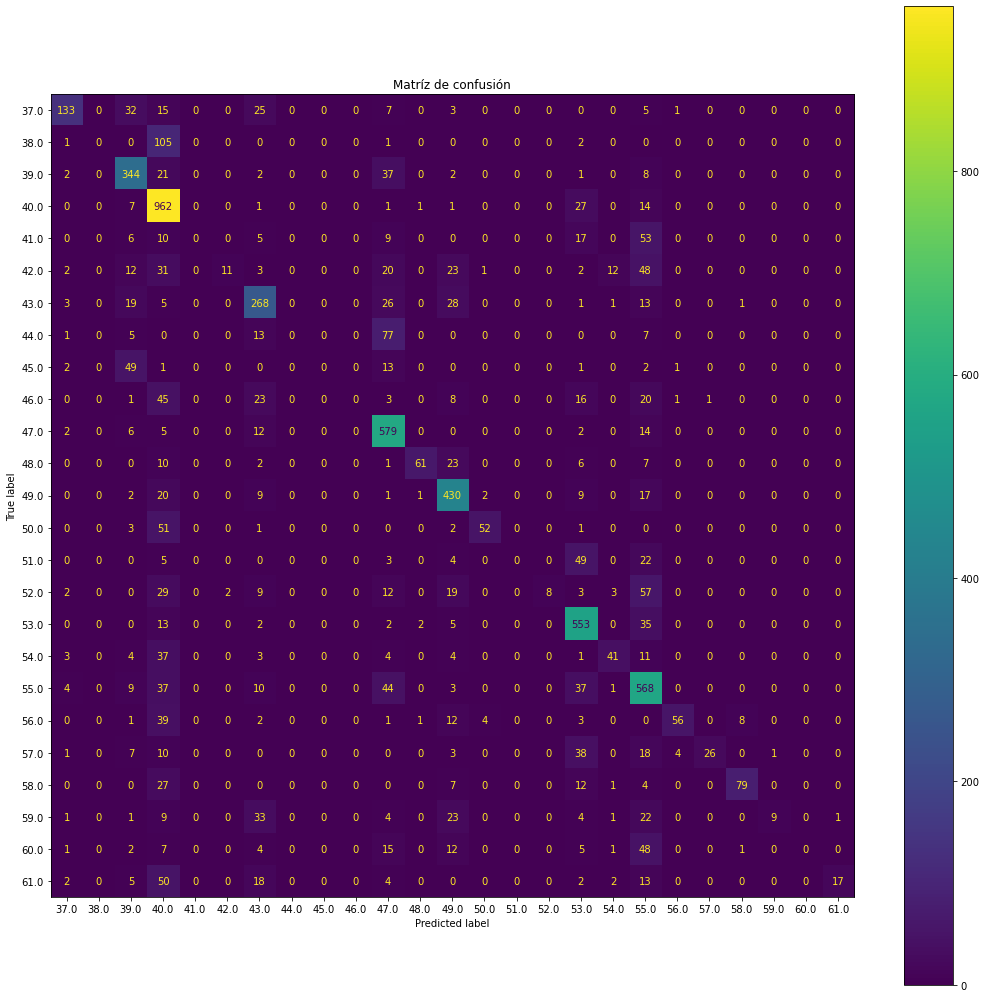

In [53]:
#Podemos calcular la matríz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

#La podemos dejar graficada para comprender mejor
fig, ax = plt.subplots(figsize = (18, 18))
plot_confusion_matrix(randomforest_model, X_test, y_test, ax = ax, values_format = '')
plt.title('Matríz de confusión')

* Try to do the same thing with numbers.

In [54]:
# Your code here

#Seleccionamos el rango para los números
numeros = list(range(1,11))

#Seleccionamos las filas del dataset que tienen datos con números
data_numeros = data.loc[data.e.isin(numeros)]

#Creamos las variables dependientes y la variable independiente para las imagenes que son números
X = data_numeros.drop(['e'], axis = 1)
y = data_numeros['e']

#Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# LINEAR REGRESSION

In [55]:
#Inicializamos el modelo.
linreg_model = LinearRegression()

#Entrenamos el modelo con el dataset de entrenamiento
linreg_model = linreg_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
y_pred = linreg_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
data_numeros_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
data_numeros_predicted.head()

,Actual,Predicted
111229,4.0,5.933900
5066,6.0,4.296683
15162,7.0,6.545193
13881,5.0,6.850408
96664,7.0,5.915719


In [56]:
#Vemos el score del modelo en el dataset de entrenamiento
print('Score del modelo en el dataset de entrenamiento:', linreg_model.score(X_train, y_train))

#También se puede hacer con r2_score
y_train_pred = linreg_model.predict(X_train)
print('R2 del modelo en el dataset de entrenamiento:', r2_score(y_train, y_train_pred))

#Vemos un score bajo

Score del modelo en el dataset de entrenamiento: 0.5286026424713726
R2 del modelo en el dataset de entrenamiento: 0.5286026424713726


In [57]:
#Vemos el score del modelo en el dataset de prueba
print('Score del modelo en el dataset de prueba:', linreg_model.score(X_test, y_test))

#También se puede hacer con r2_score
y_train_pred = linreg_model.predict(X_train)
print('R2 del modelo en el dataset de prueba:', r2_score(y_test, y_pred))

#Vemos un score con un valor raro.

Score del modelo en el dataset de prueba: -1768652244110205.0
R2 del modelo en el dataset de prueba: -1768652244110205.0


# LOGISTIC REGRESSION

In [58]:
#Inicializamos el modelo.
logreg_model = LogisticRegression()

#Entrenamos el modelo con el dataset de entrenamiento
logreg_model = logreg_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
y_pred = logreg_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
data_numeros_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
data_numeros_predicted.head()

/Users/arnoldoleyson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Actual,Predicted
111229,4.0,4.0
5066,6.0,6.0
15162,7.0,7.0
13881,5.0,5.0
96664,7.0,7.0


In [59]:
#Vemos el score del modelo en el dataset de entrenamiento
print('Score del modelo en el dataset de entrenamiento:', logreg_model.score(X_train, y_train))

#También se puede hacer con r2_score
y_train_pred = logreg_model.predict(X_train)
print('R2 del modelo en el dataset de entrenamiento:', r2_score(y_train, y_train_pred))

#Vemos un score bastante bueno

Score del modelo en el dataset de entrenamiento: 0.9437106839427584
R2 del modelo en el dataset de entrenamiento: 0.862075956645345


In [60]:
#Vemos el score del modelo en el dataset de prueba
print('Score del modelo en el dataset de prueba:', logreg_model.score(X_test, y_test))

#También se puede hacer con el accuracy score
print('Accuracy Score del modelo en el dataset de prueba:', accuracy_score(y_test, y_pred))

#También se puede hacer con r2_score
y_train_pred = logreg_model.predict(X_train)
print('R2 del modelo en el dataset de prueba:', r2_score(y_test, y_pred))

#Vemos que en el dataset de prueba el score disminuyó

Score del modelo en el dataset de prueba: 0.9251184121494624
Accuracy Score del modelo en el dataset de prueba: 0.9251184121494624
R2 del modelo en el dataset de prueba: 0.815195852405828


In [61]:
#Podemos calcular el precission score para cada letra
precision_score(y_test, y_pred, average = None)

array([0.94796238, 0.94372881, 0.91883117, 0.92005922, 0.90171607,
       0.95199459, 0.95098663, 0.88872513, 0.91163793, 0.81081081])

Text(0.5, 1.0, 'Matríz de confusión')

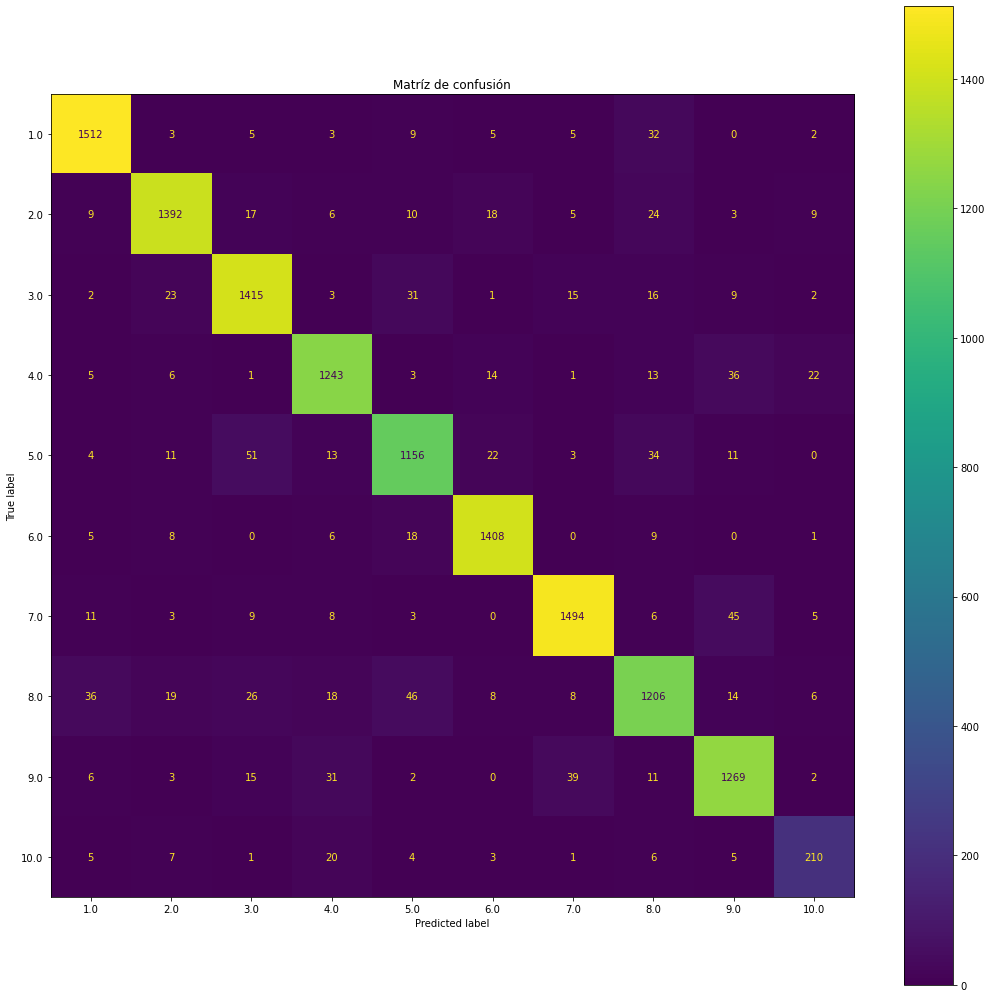

In [62]:
#Podemos calcular la matríz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

#La podemos dejar graficada para comprender mejor
fig, ax = plt.subplots(figsize = (18, 18))
plot_confusion_matrix(logreg_model, X_test, y_test, ax = ax, values_format = '')
plt.title('Matríz de confusión')

# KNN (K- Narest Neighbor)

In [63]:
#No se corre el modelo porque se tarda mucho en ejecutar

In [64]:
#Inicializamos el modelo.

#Definimos el número de vecinos con los que queremos trabajar
#num_neighbors = 3
#knn_model = neighbors.KNeighborsClassifier(num_neighbors, weights = 'distance')

#Entrenamos el modelo con el dataset de entrenamiento
#knn_model = knn_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
#y_pred = knn_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
#data_numeros_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
#data_numeros_predicted.head()

# DECISION TREE

In [65]:
#Inicializamos el modelo.
decisiontree_model = DecisionTreeClassifier(max_depth = 6, random_state = 101)

#Entrenamos el modelo con el dataset de entrenamiento
decisiontree_model = decisiontree_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
y_pred = decisiontree_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
data_numeros_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
data_numeros_predicted.head()

,Actual,Predicted
111229,4.0,4.0
5066,6.0,5.0
15162,7.0,7.0
13881,5.0,5.0
96664,7.0,7.0


In [66]:
#Vemos el score del modelo en el dataset de entrenamiento
print('Score del modelo en el dataset de entrenamiento:', decisiontree_model.score(X_train, y_train))

#También se puede hacer con r2_score
y_train_pred = decisiontree_model.predict(X_train)
print('R2 del modelo en el dataset de entrenamiento:', r2_score(y_train, y_train_pred))

#Vemos un score relativamente bueno

Score del modelo en el dataset de entrenamiento: 0.7751184180847598
R2 del modelo en el dataset de entrenamiento: 0.5110576985931861


In [67]:
#Vemos el score del modelo en el dataset de prueba
print('Score del modelo en el dataset de prueba:', decisiontree_model.score(X_test, y_test))

#También se puede hacer con el accuracy score
print('Accuracy Score del modelo en el dataset de prueba:', accuracy_score(y_test, y_pred))

#También se puede hacer con r2_score
y_train_pred = decisiontree_model.predict(X_train)
print('R2 del modelo en el dataset de prueba:', r2_score(y_test, y_pred))

#Vemos un score relativamente bueno

Score del modelo en el dataset de prueba: 0.76753627546801
Accuracy Score del modelo en el dataset de prueba: 0.76753627546801
R2 del modelo en el dataset de prueba: 0.4944065299658247


In [68]:
#Podemos calcular el precission score para cada letra
precision_score(y_test, y_pred, average = None)

array([0.91505792, 0.79451091, 0.71249174, 0.82337199, 0.76305534,
       0.81594684, 0.80386417, 0.67154472, 0.69422572, 0.43665158])

Text(0.5, 1.0, 'Matríz de confusión')

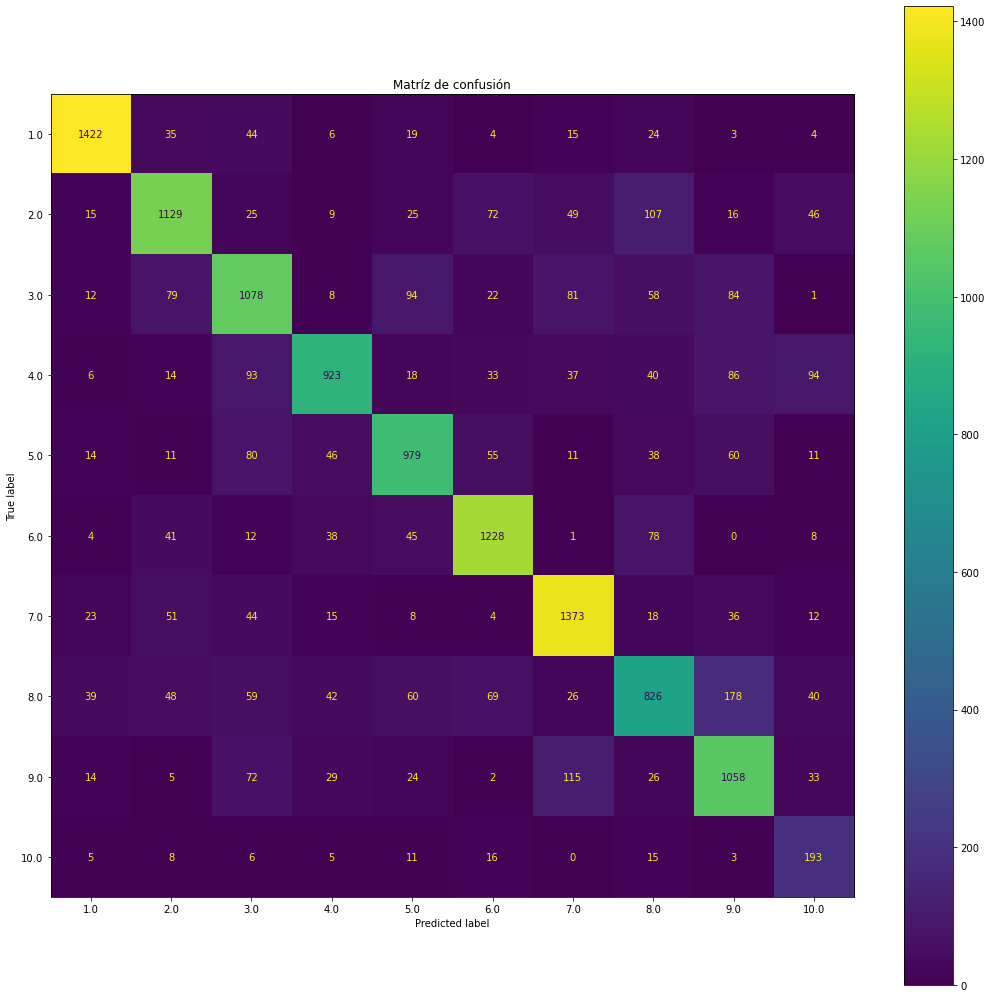

In [69]:
#Podemos calcular la matríz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

#La podemos dejar graficada para comprender mejor
fig, ax = plt.subplots(figsize = (18, 18))
plot_confusion_matrix(decisiontree_model, X_test, y_test, ax = ax, values_format = '')
plt.title('Matríz de confusión')

# RANDOM FOREST

In [70]:
#Inicializamos el modelo.
randomforest_model = RandomForestClassifier(n_estimators = 300, max_depth = 5, random_state = 101)

#Entrenamos el modelo con el dataset de entrenamiento
randomforest_model = randomforest_model.fit(X_train, y_train)

#Hacemos la predicción con las variables independientes del dataset de prueba
y_pred = randomforest_model.predict(X_test)

#Vemos el dataframe de las predicciones vs los valores reales
data_numeros_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
data_numeros_predicted.head()

,Actual,Predicted
111229,4.0,4.0
5066,6.0,6.0
15162,7.0,7.0
13881,5.0,5.0
96664,7.0,7.0


In [71]:
#Vemos el score del modelo en el dataset de entrenamiento
print('Score del modelo en el dataset de entrenamiento:', randomforest_model.score(X_train, y_train))

#También se puede hacer con r2_score
y_train_pred = randomforest_model.predict(X_train)
print('R2 del modelo en el dataset de entrenamiento:', r2_score(y_train, y_train_pred))

#Vemos un score bueno, mejoró un poco respecto al modelo de Decision Tree

Score del modelo en el dataset de entrenamiento: 0.8582992907445929
R2 del modelo en el dataset de entrenamiento: 0.6694804807985304


In [72]:
#Vemos el score del modelo en el dataset de prueba
print('Score del modelo en el dataset de prueba:', randomforest_model.score(X_test, y_test))

#También se puede hacer con el accuracy score
print('Accuracy Score del modelo en el dataset de prueba:', accuracy_score(y_test, y_pred))

#También se puede hacer con r2_score
y_train_pred = randomforest_model.predict(X_train)
print('R2 del modelo en el dataset de prueba:', r2_score(y_test, y_pred))

#Vemos que en el dataset de prueba el score se mantiene bastante similar al de entrenamiento

Score del modelo en el dataset de prueba: 0.850838282835877
Accuracy Score del modelo en el dataset de prueba: 0.850838282835877
R2 del modelo en el dataset de prueba: 0.6610694882909758


In [73]:
#Podemos calcular el precission score para cada letra
precision_score(y_test, y_pred, average = None)

array([0.87398844, 0.88896458, 0.85356455, 0.86271676, 0.9197861 ,
       0.87491941, 0.87612323, 0.80067002, 0.71737823, 1.        ])

Text(0.5, 1.0, 'Matríz de confusión')

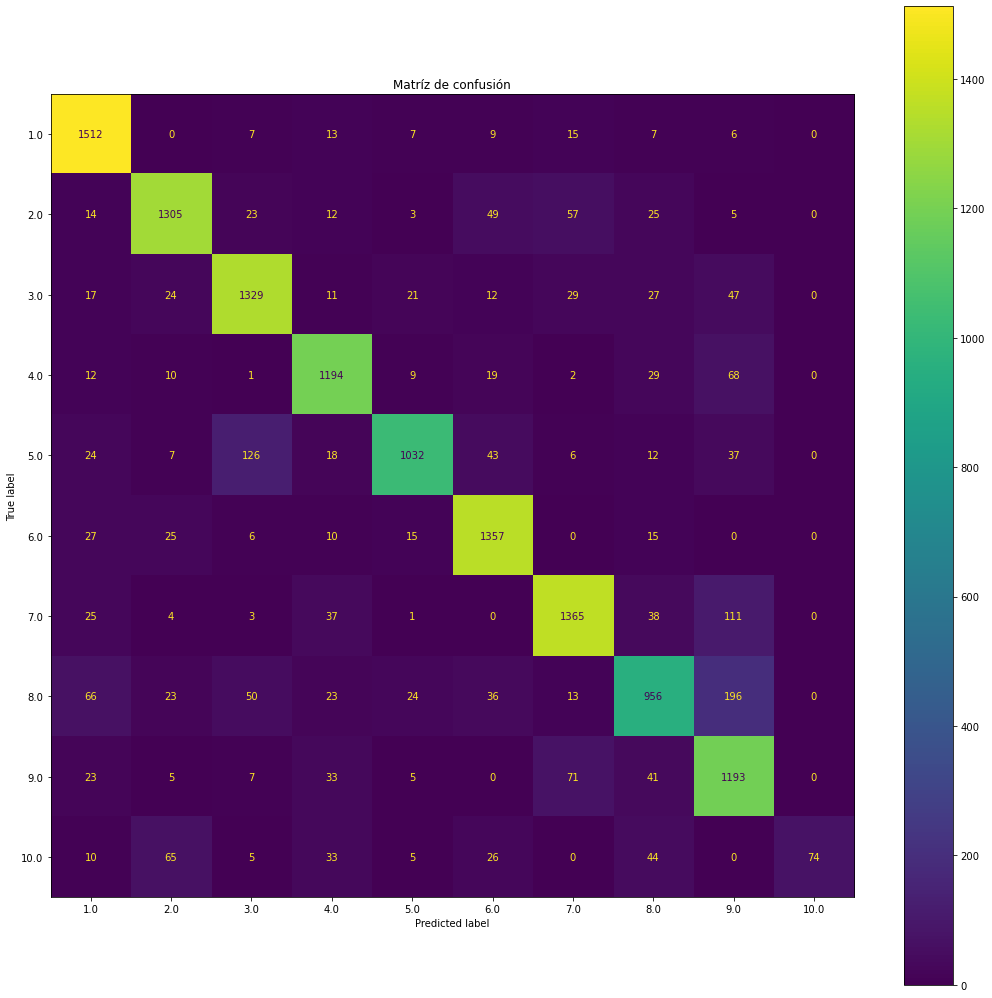

In [74]:
#Podemos calcular la matríz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

#La podemos dejar graficada para comprender mejor
fig, ax = plt.subplots(figsize = (18, 18))
plot_confusion_matrix(randomforest_model, X_test, y_test, ax = ax, values_format = '')
plt.title('Matríz de confusión')